# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [14]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


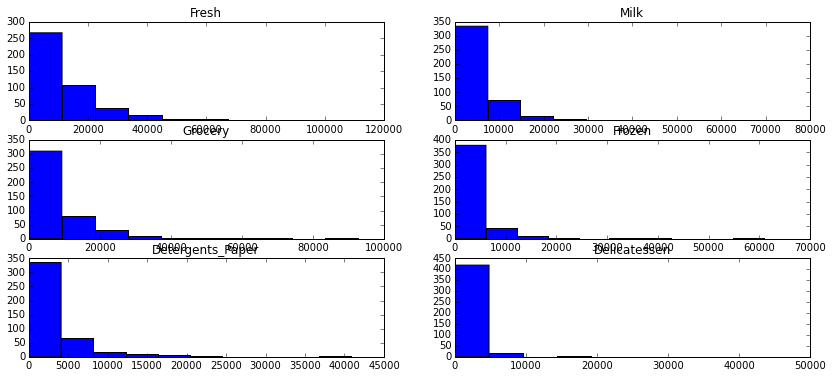

In [15]:
plt.figure(figsize = (14, 6))
for i, col in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    plt.hist(data[col])
    plt.title(col)


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:
PCA: the first principal component has the largest possible variance,each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.For the given dataset, Looking at the variance of each column , we can see that fresh and grocery have largest variances, so they might show up as first PCA dimensions.
ICA, subcomponents are non-Gaussian signals and that they are statistically independent from each other.ICA find the independent components by maximizing the statistical independence of the estimated components. so all features will be used,  six vectors comprised of the six features. all the column, fresh ,grocery,milk, frozen ,detergenet paper and delicatessen or their combinations could be possible show up as the first pca dimensions. delicatessen is quite special product which has big difference with the others, so iteslf may show up as one dimensions. it might represent some kinds of deli stores 

###PCA

In [16]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


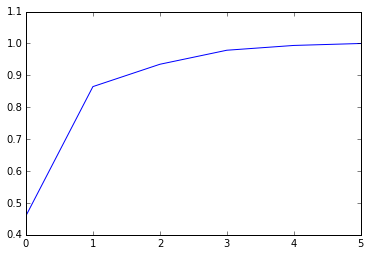

In [17]:

x = np.arange(6)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer:
according to pca.explained_variance_ratio_ ,the variance drops sharply after the second component .the first two principal components retains majority of the variance - about 86% of the variance.we would choose the first two component,since PCA try to project the data to a lower dimensional space and minimize information loss  by retaining the maximum variance in the data . and 2 dimensions is also great for visualization purposes as well

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
from the pca.components_ data, we can see that The first component seems to incorporate mostly Fresh  and a little of frozen and milk. the second component seens to comprised of Grocery, Milk, and Detergents_Paper.
The dimensions represent eigenvectors,The eigenvector with the highest eigenvalue is therefore the principal component. since the first component mainly dependent on the fresh,the second component has a larger part of gocery.so fresh and gocery carry most information. we can make a quick rough anlaysis only based on those two,which reduce the data to lower dimension.
or if we have limited rescouce ,we can focus only on those two features, make the analysis more simple.


 


###ICA

In [18]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
centered_data = data.copy()
mean_data = centered_data.mean(axis=0)
centered_data -= mean_data 
centered_data /= centered_data.std(axis=0)
ica = FastICA(n_components=6).fit(centered_data)
ica_data = ica.components_




# Print the independent components
print ica.components_

[[ 0.00488752  0.00162026  0.00570819  0.00253453 -0.00243202 -0.05102285]
 [-0.00194344 -0.07266128  0.05521659  0.00176604 -0.01581387  0.01708211]
 [ 0.01094237  0.00103673 -0.00735628 -0.05411102  0.00264598  0.01678594]
 [-0.05028489  0.00634171  0.00594375  0.00328828 -0.00983901  0.00294073]
 [ 0.00378935 -0.01703127 -0.11459861  0.00710163  0.13448353  0.01616414]
 [-0.00266191  0.01391865 -0.06107379 -0.00199608  0.00385086  0.00410089]]


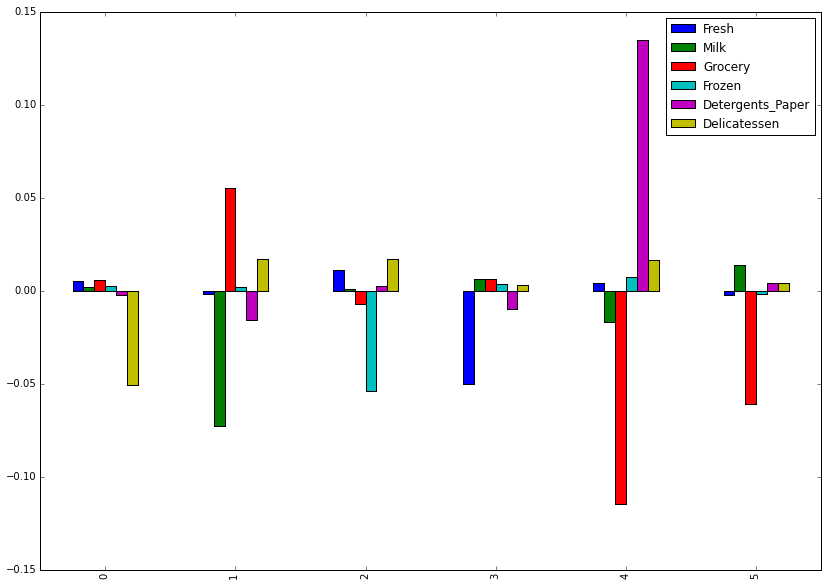

In [19]:
pd.DataFrame(ica.components_, columns = data.columns).plot(kind = 'bar',figsize=(14,10))



**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer:
ICA is a special case of blind source separation.ICA is to find some  statistically independent components.ICA components really measure the linear differences between the original features.
the first component  appears to be  mainly positive related to detergents_paper but negative related to grocery.this vector capture something anti-correlation between gocery and detergent_papers.
The second basis vector seems mainly positive relate to grocery. The third appears to postive related to milk and negative related to grocery.the fourth seems mainly positive related to fresh. the fifth seems negative related to frozen. the last one seems postive relate to delicatessen. 

these components are statistically independent,they may represent different customer groups or the hidden factors of customer groups. so the components can help to identify the different customer groups. for example the first component may indicated school or office type customer who need detergent_papers a lot,but barely need gocery.


##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer:
both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the expectation-maximization mechanism allows clusters to have different shapes.
advantage of K mean clustering:
1)fast,easy to understand
2)Gives best result when data set are distinct or well separated from each other

Advantages of Gaussian Mixture Models:
 
1)It is the fastest algorithm for learning mixture models
2)Take into account both covariance structure and variances in the data  
3)soft assignment (i.e. assign a probability to the class of the point of interest) instead classifying the point of interest as to belonging to only one class. 

Based on this comparison,GMM is more suitable for this dataset.although K Means is fast, but GMM gives a lot more structural information, give more reasonable cluster shape. and our data don't have a clear seperation boundary,GMM is better suited than Kmean.


**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [20]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [21]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(centered_data)
 
print reduced_data[:10]  # print upto 10 elements

[[-0.19307077  0.30475306]
 [-0.43392596  0.32803921]
 [-0.81022096 -0.81416893]
 [ 0.7777625  -0.65201155]
 [-0.16609819 -1.26998809]
 [ 0.15599237  0.29480541]
 [ 0.33490718  0.52440632]
 [-0.14042659  0.23073005]
 [ 0.51673134  0.65861312]
 [-1.59029884  0.74016879]]


In [31]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
#from sklearn.cluster import KMeans
#km=KMeans(n_clusters=2)
#clusters = km.fit(reduced_data)
def cluster(clustermethod):
    clusters=clustermethod.fit(reduced_data)
    print clusters
    return clusters

In [32]:
def plot_boundary(clusters):
# Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    return Z,xx,yy,x_min,x_max,y_min,y_max

In [33]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
def cluster_means(clusters, func_name):
    centroids = getattr(clusters, func_name)
    print centroids
    return centroids


In [34]:
# Put the result into a color plot
def color_plot(clusters, Z,xx,yy,x_min,x_max,y_min,y_max,centroids):
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [38]:
def cluster_and_plot(clustermenthod,func_name):
    clusters = cluster(clustermenthod)
    Z,xx,yy,x_min,x_max,y_min,y_max = plot_boundary(clusters)
    centroids = cluster_means(clusters,func_name)
    color_plot(clusters,Z,xx,yy,x_min,x_max,y_min,y_max,centroids)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
[[ 0.45816509  0.09519893]
 [-2.46774412 -0.51275533]]


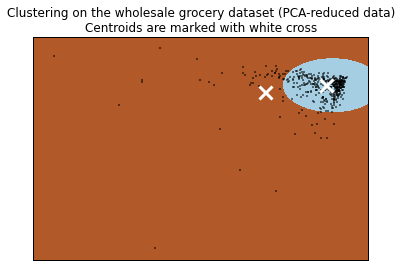

In [39]:
cluster_and_plot(GMM(n_components=2),'means_')

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
[[ 0.81405818 -0.09010488]
 [-0.73693473  0.6300483 ]
 [-2.8760022  -1.7005435 ]]


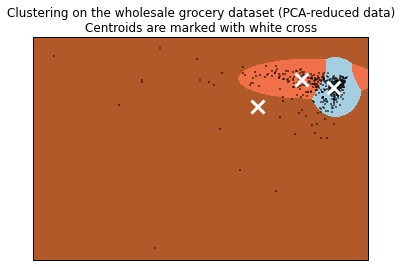

In [40]:
cluster_and_plot(GMM(n_components=3),'means_')

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
[[ 0.82560508 -0.09028351]
 [-5.91141455  1.01867828]
 [-1.17991363 -2.89176697]
 [-0.67497835  0.61478401]]


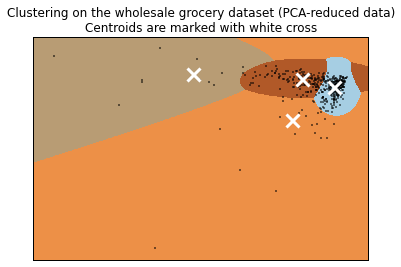

In [41]:
cluster_and_plot(GMM(n_components=4),'means_')

In [ ]:
compare the pictues, we can see the one with 2 clusters are better fit the data

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 
Central objects are centroids. which means the "average" customer in that group.
There are two distint clusters: whole sale customers, and retailor customers. 
from the plot it seems that the customers in the oval shape cluster are group more closely and have low variation ,they may represnt the retailors,they brought  balance amount of fresh and grcoery ,while  whole sales customers have high variations are scattered in  the rest of the space.they usually prefer one much more than the other.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer:
PCA gave the most insight of the data, it reduce the dimensions from 6 to 2 and still kept 86% variance.it make the complex data more easily to analysis and still keep most information . based on those two components it is easy to clustering using GMM .those two dimension refelct most of the  buying habit of different customer groups. the customer buy similar percentage fresh and grcoery may indicate small shopper. the customer buy larger percentage grcoery may indicate whole sale shopper.



**9)** How would you use that technique to help the company design new experiments?

Answer:
since customers were clustering into two different groups, we can use them to do A/B tests. 
For example, if the company want to test the influence of  new delivery method on the customer, they can compare the results between the two different groups. for example whole sales may like bulk delivery, but retailor may prefer quick and small packed delivery.so if the company switch the shipmethod to bulk delivery, the retailor group may have a big decline in satisfication, while the other group may not.
the company also do other A/B test like marketing strategy or sales for one perticular product and observe the impact.

**10)** How would you use that data to help you predict future customer needs?

Answer:
after A/B test, we may can identify these clusters and lable them. when we get new customer, we can use supervised learning method to classify them. for example according to the products they buy, using KNN, we may can classify them as whole sales group.then we may recommand the bulk delivery and some product packed in large amount or give them certain discount.
we also can do more segmentation analysis for each group to evaluate their buying habits,amount and time. we can customized our business strategy for different customer group. so we can better serve our customer.
 